# Klasifikasi pelanggan deposito

Step :
1. Exploratory data analysis (plot, distrbusi, missing value, dll)
2. Data preprocessing ( encoding, scaling, splitting)
3. Feature importance
4. Choosing best model (SVM, LG, DT, NB, RF)
5. Implement best model
6. Make a simple prediction

# 1. Exploratory data Analyisis

# About dataset

## Bank marketing dataset

Dataset ini adalah adalah dataset perbankan portugal dalam melaksanakan campaign marketing untuk menawarkan layanan deposit, penawaran ini dilakukan lewat telefon.

Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012

Berikut keterangan fitur - fitur datasetnya.

1. age : Umur target (numeric)
2. job : jenis pekerjaan target (categorical : : 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : status perkawinan (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education : tingkat pendidikan terakhir (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default : apakah memiliki kredit (categorical: 'no','yes','unknown')
6. balance : rata - rata balance per tahun dalam euro (numeric)
7. housing : status kredit rumah (binary: "yes","no")
8. loan : status kepemilikan pinjaman (binary: "yes","no")
9. contact : jenis kontak (categorical: "unknown","telephone","cellular")
10. day : hari terakir dikontak pada bulan tersebut (numeric)
11. month : bulan terakhir dikontak (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration : durasi kontak dalam detik (numerik)
13. campaign : jumlah kontak yang dilakukan selama campaign berlangsung
14. pdays : jumlah hari setelah hari terakhir client dikontak pada campaign (numeric, -1 berarti belum pernah dikontak sebelumnya)
15. previous : jumlah kontak yang dilakuknan sebelum campaign berjalan (numeric)
16. poutcome : keluaran dari campaign yang sebelumnya (categorical: "unknown", "other", "failure", "success")
17. y : apakah client menerima penawaran layanan deposit (binary : 'Yes', 'No')

In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('datasets/Bank Marketing.csv')

# Data exploration

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
len(df)

45211

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  int32 
 2   marital    45211 non-null  int32 
 3   education  45211 non-null  int32 
 4   default    45211 non-null  int32 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int32 
 7   loan       45211 non-null  int32 
 8   contact    45211 non-null  int32 
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  int32 
 16  y          45211 non-null  object
dtypes: int32(8), int64(7), object(2)
memory usage: 4.1+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


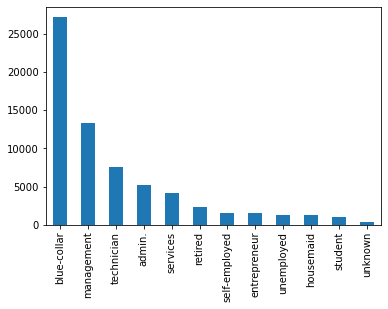

In [11]:
df['job'].value_counts().plot(kind='bar')

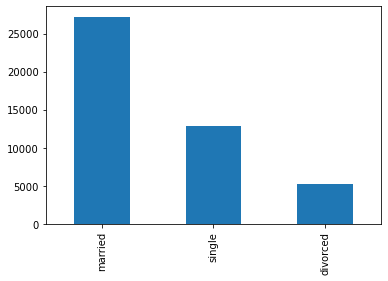

In [76]:
df['marital'].value_counts().plot(kind='bar')

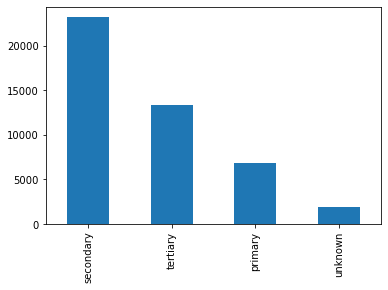

In [13]:
df['education'].value_counts().plot(kind='bar')

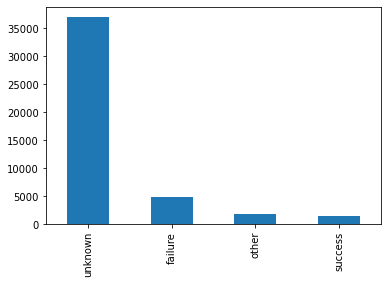

In [16]:
df['poutcome'].value_counts().plot(kind='bar')

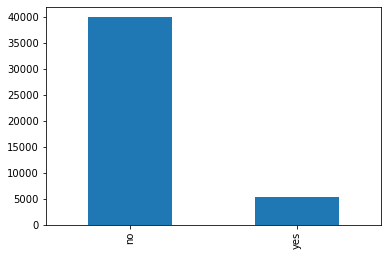

In [17]:
df['y'].value_counts().plot(kind='bar')

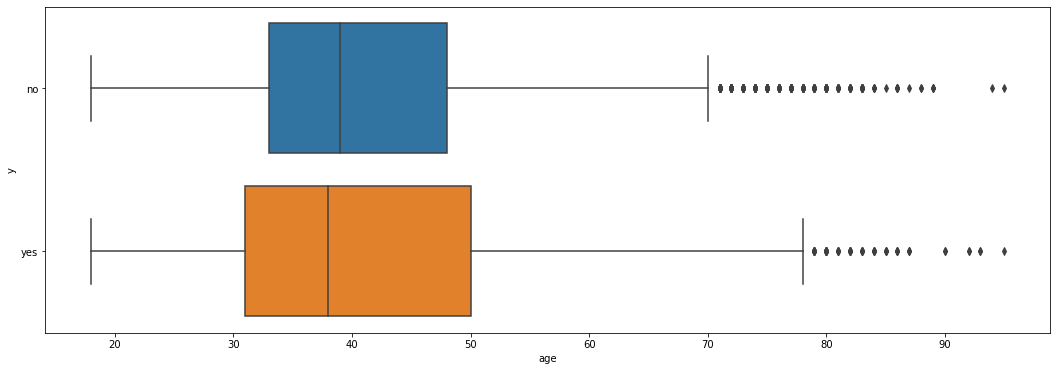

In [92]:
plt.figure(figsize =(18,6))
sns.boxplot("age", "y", data=df)
plt.show()

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

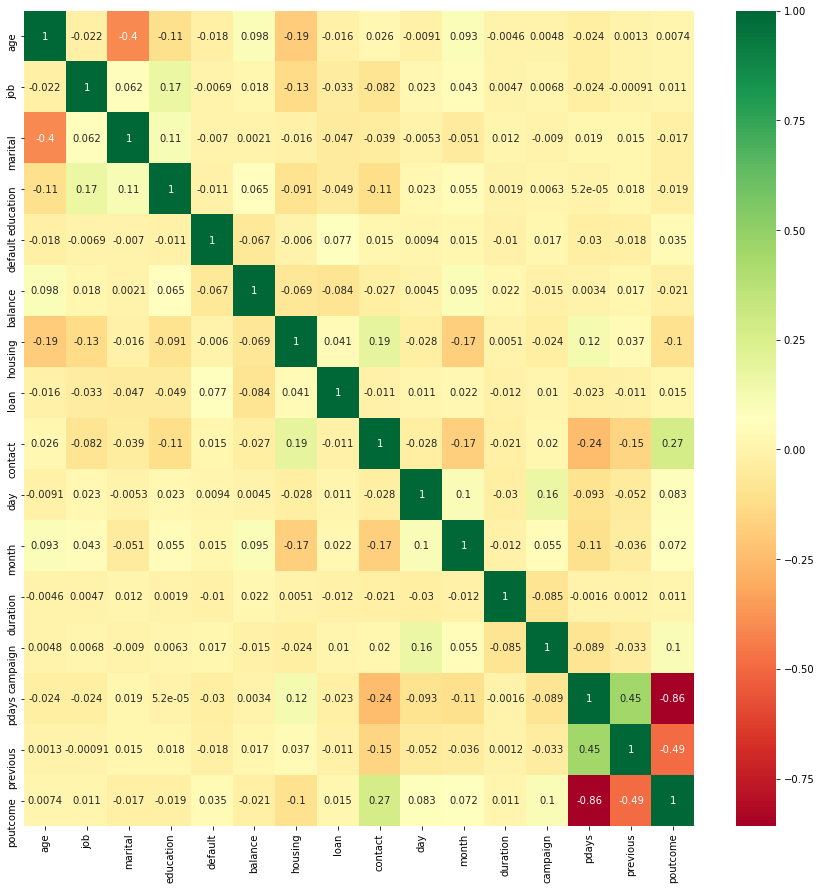

In [73]:

X = df.iloc[:,0:15 ]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

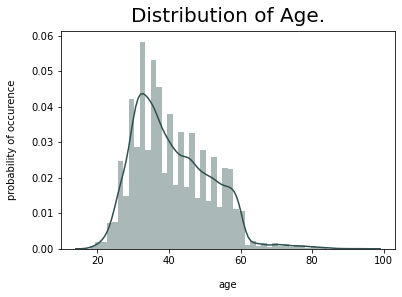

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['age'], color="darkslategrey")
plt.xlabel("age", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Age.", y=1.015, fontsize=20);

## Kesimpulan exploratory data 

1. Tidak ada missing value pada data
2. Lebih banyak jawaban 'No' dibanding 'Yes'
3. Korelasi antar data tidak terlalu berkolerasi
4. Distribusi umur yang ada pada data paling tinggi di daerah 20 - 40 tahun

# 2. Data Preprocessing

## Data preprocessing

In [10]:
#Encoding dan melihat hasil mapping

# LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df['marital'] = le.fit_transform(df['marital'])
mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))
print(mapping)
df['job'] = le.fit_transform(df['job'])
mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))
print(mapping)
df['education'] = le.fit_transform(df['education'])
mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))
print(mapping)
df['default'] = le.fit_transform(df['default'])
mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))
print(mapping)
df['housing'] = le.fit_transform(df['housing'])
mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))
print(mapping)
df['loan'] = le.fit_transform(df['loan'])
mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))
print(mapping)
df['contact'] = le.fit_transform(df['contact'])
mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))
print(mapping)
df['poutcome'] = le.fit_transform(df['poutcome'])
mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))
print(mapping)
# df.head()

{'divorced': 0, 'married': 1, 'single': 2}
{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
{'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'cellular': 0, 'telephone': 1, 'unknown': 2}
{'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}


In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,no


In [51]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [12]:
# encoding month
# create dictionary of ordinal to integer mapping
ord_1 = {'jan':1, 
            'feb':2, 
            'mar':3, 
            'apr':4, 
            'may':5, 
            'jun':6,
            'jul':7,
            'aug':8,
            'sep':9,
            'oct':10,
            'nov':11,
            'dec':12}
# apply using map
df['month'] = df.month.map(ord_1)


In [13]:
## Dataframe scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['balance', 'duration']] = scaler.fit_transform(df[['balance', 'duration']])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,0.092259,1,0,2,5,5,0.053070,1,-1,0,3,no
1,44,9,2,1,0,0.073067,1,0,2,5,5,0.030704,1,-1,0,3,no
2,33,2,1,1,0,0.072822,1,1,2,5,5,0.015453,1,-1,0,3,no
3,47,1,1,3,0,0.086476,1,0,2,5,5,0.018707,1,-1,0,3,no
4,33,11,2,3,0,0.072812,0,0,2,5,5,0.040260,1,-1,0,3,no


In [14]:
X = df.iloc[:,0:15]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# 3. Feature importance

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.10268306 0.05908821 0.02549437 0.03356146 0.00251708 0.09821376
 0.02307064 0.0099128  0.02676998 0.10345325 0.09919089 0.25447337
 0.06117272 0.06012335 0.04027506]


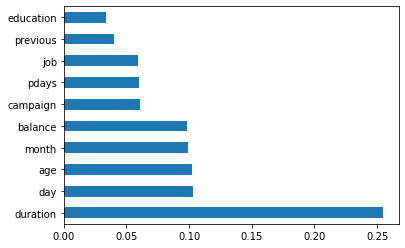

In [16]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Disini kita dapat melihan tingakat kepentingan fitur yang diuji dengan menggunakan extraTreesCalssifier, duration menjadi fitur dengan tingkat kepentingan tertinggi

# 4. Choosing best model

In [20]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report

In [21]:
X = df.iloc[:,0:15]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True)

In [23]:
classifiers = []
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5=LogisticRegression()
classifiers.append(model5)
model6 = GaussianNB()
classifiers.append(model6)

In [24]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(report)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

c:\python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          no       0.88      1.00      0.94     11977
         yes       0.00      0.00      0.00      1587

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564

Accuracy of SVC() is 0.8829991153052197
Confusion Matrix of SVC() is [[11977     0]
 [ 1587     0]]
              precision    recall  f1-score   support

          no       0.93      0.93      0.93     11977
         yes       0.46      0.48      0.47      1587

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.88      0.87      0.88     13564

Accuracy of DecisionTreeClassifier() is 0.874447065762312
Confusion Matrix of DecisionTreeClassifier() is [[11103   874]
 [  829   758]]
              precision    recall  f1-score   support

          no       0.92      0.97      0.95     11977


c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

          no       0.88      1.00      0.94     11977
         yes       0.33      0.00      0.00      1587

    accuracy                           0.88     13564
   macro avg       0.61      0.50      0.47     13564
weighted avg       0.82      0.88      0.83     13564

Accuracy of LogisticRegression() is 0.8828516661751695
Confusion Matrix of LogisticRegression() is [[11973     4]
 [ 1585     2]]
              precision    recall  f1-score   support

          no       0.93      0.91      0.92     11977
         yes       0.41      0.45      0.43      1587

    accuracy                           0.86     13564
   macro avg       0.67      0.68      0.67     13564
weighted avg       0.87      0.86      0.86     13564

Accuracy of GaussianNB() is 0.8600707755824241
Confusion Matrix of GaussianNB() is [[10953  1024]
 [  874   713]]


Didapatkan bahwa Random Forest Classifier menjadi model yang memiliki tingkat akurasi paling tinggi maka dari itu saya pilih sebagai model yang akan dipakaim

# 5. Implement the model

# Random Forest Classifier

In [25]:
model4 = RandomForestClassifier()

In [26]:
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)

In [27]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9007667354762607

# 6. Make a simple prediction

## Membuat prediksi
- {'divorced': 0, 'married': 1, 'single': 2} marital
- {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11} job
- {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3} education
- {'no': 0, 'yes': 1} default
- {'no': 0, 'yes': 1} housing
- {'no': 0, 'yes': 1} loan
- {'cellular': 0, 'telephone': 1, 'unknown': 2} contact
- {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3} poutcome

In [30]:
## age	job	marital	education	default	balance	housing	loan	contact	day	month	duration	campaign	pdays	previous	poutcome	
model4.predict([[19,2, 2, 2, 9, 4000, 1, 0, 0, 5, 9, 390, 1, -1, 0]])


array(['yes'], dtype=object)

In [31]:
model4.predict_proba([[19,2, 2, 2, 9, 4000, 1, 0, 0, 5, 9, 390, 1, -1, 0]])

array([[0.46, 0.54]])

Model dipakai untuk memprediksi dengan angka diatas dan didapat prediksi 'Yes' dengan probabilitas 0.54